<a href="https://colab.research.google.com/github/YaminArafat/DLAFSMP/blob/master/first_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import re
import string
import pandas as pd
import numpy as np
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:


nltk.download()

In [ ]:
data=pd.read_csv('/content/train.csv')
#print(data)

In [ ]:
all=[]
lemmatizer= WordNetLemmatizer()
stemmer= PorterStemmer()
#max_len=0
#min_len=100000000
for i in range(0, len(data)):
  edit=re.sub('[^a-zA-Z]', ' ', data['text'][i])
  edit=edit.lower()
  edit=nltk.word_tokenize(edit)
  edit=[word for word in edit if len(word)>1]
  edit=[word for word in edit if word.isalpha()]
  edit=[word for word in edit if not word in stopwords.words('english')]
  edit=[lemmatizer.lemmatize(word) for word in edit]
  #len_edit=len(edit)
  #max_len=max(max_len, len_edit)
  #min_len=min(min_len, len_edit)
  #s=data['label'][i]+""
  #edit.append(str(data['label'][i]))
  edit=' '.join(edit)
  all.append(edit)

In [ ]:
print(all)

In [ ]:
temp=[]
for i in range(0, len(all)):
  edit=all[i].split()
  temp.append(edit)

In [ ]:
w2v=Word2Vec(temp)
pp=w2v.wv
pp.load_word2vec_format(),len(temp)

In [ ]:
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(all).toarray()

In [ ]:
y=data['label']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=0)

In [ ]:
depr=MultinomialNB().fit(x_train, y_train)

In [ ]:
y_pred=depr.predict(x_test)

In [ ]:
depr=depr.to_dict()

AttributeError: ignored

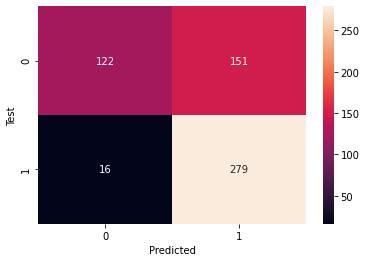

In [ ]:
#confu=confusion_matrix(y_test,y_pred)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Test'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='.05g')
plt.show()  

In [ ]:
accu=accuracy_score(y_test,y_pred)
prescn=precision_score(y_test, y_pred)
recl=recall_score(y_test, y_pred)
f1=f1_score(y_test,y_pred)
accu,prescn,recl,f1

(0.7059859154929577,
 0.6488372093023256,
 0.9457627118644067,
 0.7696551724137931)